In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
df1 = pd.read_csv('/content/Tensile-test-lab#4Data.csv')
df2 = pd.read_csv('/content/part2Tensile-test-lab#4Data.csv')
df3 = pd.read_csv('/content/part3Tensile-test-lab#005Data.csv')

displacement_1 = df1['Displacement_mm']
force1 = df1['Force_N']
displacement_2 = df2['Displacement_mm']
force2 = df2['Force_N']
displacement_3 = df3['Displacement_mm']
force3 = df3['Force_N']

In [10]:
# Overview of tensile test dataset 1 using Minitab

| **Statistic**                          | **Value**  |
|----------------------------------------|-----------|
| **N** (Number of observations)         | 114       |
| **N*** (Missing values)                | 0         |
| **Mean**                               | 6.19      |
| **SE Mean** (Standard Error of the Mean)| 0.34      |
| **StDev** (Standard Deviation)         | 3.63      |
| **Minimum**                            | 0         |
| **Q1** (1st Quartile)                  | 3.03      |
| **Median**                             | 6.19      |
| **Q3** (3rd Quartile)                  | 9.35      |
| **Maximum**                            | 12.39     |


Find tensile strength, elastic modulus, shear modulus (psi)

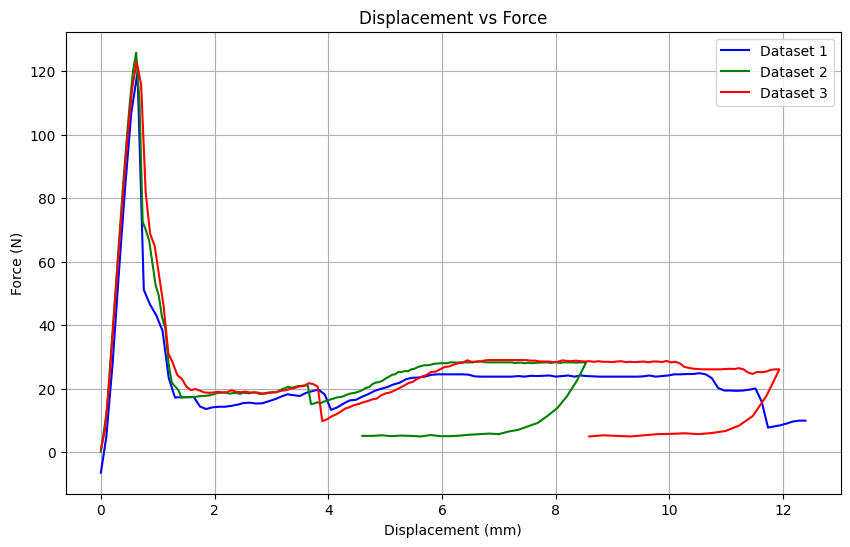

In [11]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot each dataset
plt.plot(displacement_1, force1, label='Dataset 1', color='b')
plt.plot(displacement_2, force2, label='Dataset 2', color='g')
plt.plot(displacement_3, force3, label='Dataset 3', color='r')

# Adding titles and labels
plt.title('Displacement vs Force')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [12]:
# Force vs. Displacement of first dataset using Minitab

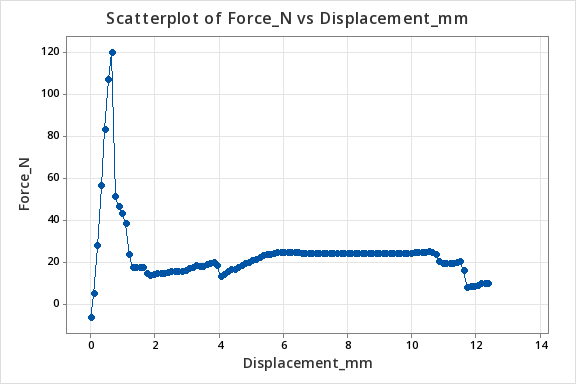

In [13]:
strain_1 = displacement_1/40 # units of mm/mm
stress_1 = force1/4 # units of N/mm^2 or MPa
strain_2 = displacement_2/40 # units of mm/mm
stress_2 = force2/4 # units of N/mm^2 or MPa
strain_3 = displacement_3/40 # units of mm/mm
stress_3 = force3/4 # units of N/mm^2 or MPa

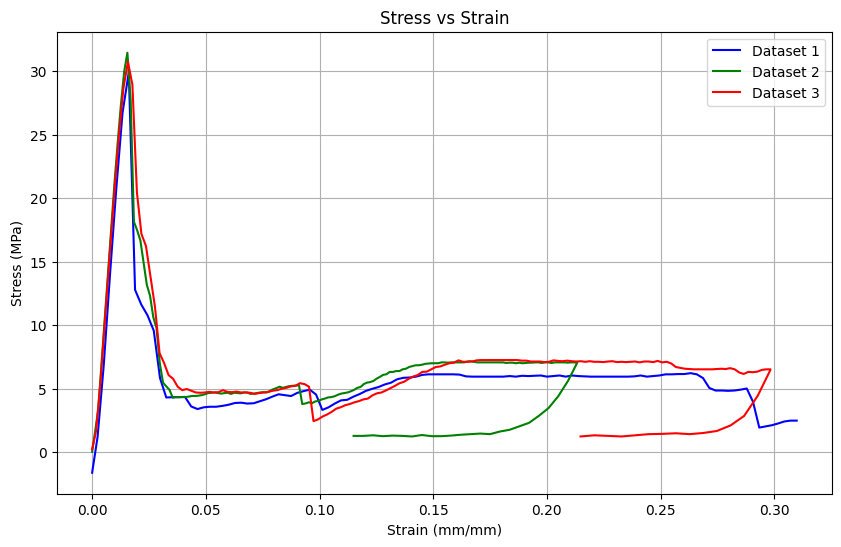

In [14]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot each dataset
plt.plot(strain_1, stress_1, label='Dataset 1', color='b')
plt.plot(strain_2, stress_2, label='Dataset 2', color='g')
plt.plot(strain_3, stress_3, label='Dataset 3', color='r')

# Adding titles and labels
plt.title('Stress vs Strain')
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [15]:
# Stress vs strain graph for first dataset in minitab

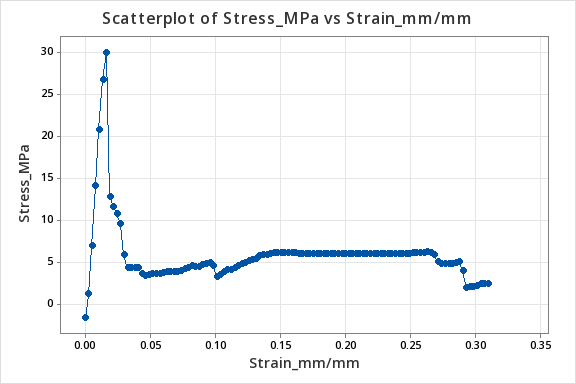

In [16]:
avg_tensile_strength = (max(stress_1) + max(stress_2) + max(stress_3))/3
print(f"{avg_tensile_strength} MPa")

30.7135 MPa


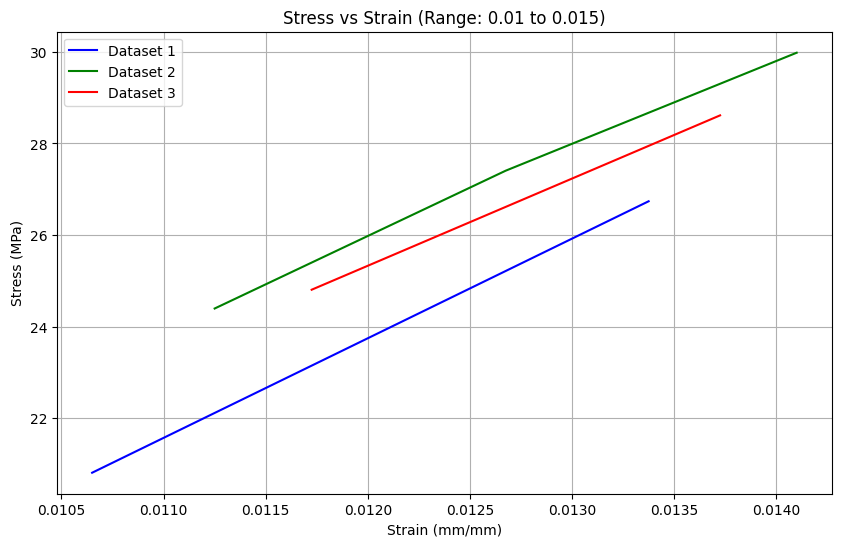

In [17]:
range_1 = (strain_1 >= 0.01) & (strain_1 <= 0.015)
strain_1_filtered = strain_1[range_1]
stress_1_filtered = stress_1[range_1]

range_2 = (strain_2 >= 0.01) & (strain_2 <= 0.015)
strain_2_filtered = strain_2[range_2]
stress_2_filtered = stress_2[range_2]

range_3 = (strain_3 >= 0.01) & (strain_3 <= 0.015)
strain_3_filtered = strain_3[range_3]
stress_3_filtered = stress_3[range_3]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each dataset with the filtered data
plt.plot(strain_1_filtered, stress_1_filtered, label='Dataset 1', color='b')
plt.plot(strain_2_filtered, stress_2_filtered, label='Dataset 2', color='g')
plt.plot(strain_3_filtered, stress_3_filtered, label='Dataset 3', color='r')

# Adding titles and labels
plt.title('Stress vs Strain (Range: 0.01 to 0.015)')
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [18]:
def get_slope(x, y):
    # Reshape the data for linear regression (x should be a 2D array)
    x = x.values.reshape(-1, 1)
    y = y.values

    # Perform linear regression
    model = LinearRegression()
    model.fit(x, y)

    # Return the slope (coefficient) and intercept
    return model.coef_[0], model.intercept_

# Perform linear regression for each dataset
slope1, intercept1 = get_slope(strain_1_filtered, stress_1_filtered)
slope2, intercept2 = get_slope(strain_2_filtered, stress_2_filtered)
slope3, intercept3 = get_slope(strain_3_filtered, stress_3_filtered)

# Print the slopes
print(f"Slope for Dataset 1 (0.01 to 0.015 range): {slope1:.2f} MPa/(mm/mm)")
print(f"Slope for Dataset 2 (0.01 to 0.015 range): {slope2:.2f} MPa/(mm/mm)")
print(f"Slope for Dataset 3 (0.01 to 0.015 range): {slope3:.2f} MPa/(mm/mm)")

Slope for Dataset 1 (0.01 to 0.015 range): 2173.76 MPa/(mm/mm)
Slope for Dataset 2 (0.01 to 0.015 range): 1958.51 MPa/(mm/mm)
Slope for Dataset 3 (0.01 to 0.015 range): 1902.37 MPa/(mm/mm)


In [19]:
Young_modulus = (slope1 + slope2 + slope3)/3
print(f"{Young_modulus} MPa")

2011.5484132732429 MPa


In [20]:
poissons_ratio_pla = 0.35   # Given poisson's ratio


G = (Young_modulus) / (2 * (1 + poissons_ratio_pla))
print(f"Shear modulus is {G} MPa")

Shear modulus is 745.0179308419417 MPa


In [21]:
# Linear Region of graph by inspection subsetted in Mintab

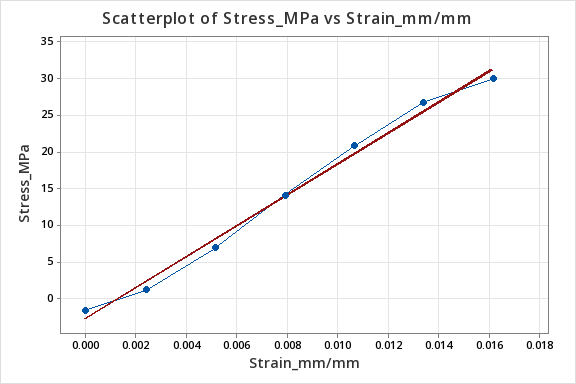

In [22]:
# Stress/strain descriptive statistics in the linear region

Statistics                        | Value
---------------------------------- | ----------------
Variable                          | Stress/Strain_MPa
N                                  | 6
N*                                 | 1
Mean                               | 1575.59
SE Mean                            | 233.340
StDev                              | 571.563
Minimum                            | 508.542
Q1                                 | 1140.98
Median                             | 1819.91
Q3                                 | 1965.52
Maximum                            | 1999.05


In [23]:
Young_modulus_Minitab = 1575.59
print(f"{Young_modulus_Minitab} MPa")

1575.59 MPa


In [24]:
G_Minitab = (Young_modulus_Minitab) / (2 * (1 + poissons_ratio_pla))
print(f"Shear modulus is {G_Minitab} MPa")

Shear modulus is 583.5518518518518 MPa
